In [3]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [5]:
wine = load_wine()

In [6]:
wine.data.shape

(178, 13)

In [7]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [10]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [11]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [12]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3)
#0.3表示30%做测试集，70%做训练集

In [13]:
Xtrain.shape

(124, 13)

In [14]:
wine.data.shape

(178, 13)

In [43]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score
#决策树本身有随机性

0.9629629629629629

0.9444444444444444

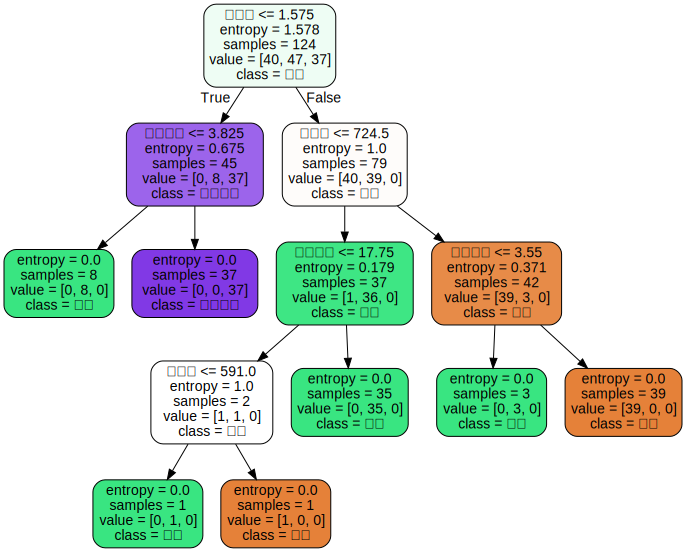

In [35]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names = feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True)
graph = graphviz.Source(dot_data)
graph
#图的颜色越浅，代表此结点的不纯度越高

In [19]:
clf.feature_importances_
#属性的重要性，数值越大对建树越重要

array([0.        , 0.        , 0.        , 0.02368005, 0.        ,
       0.        , 0.44090512, 0.        , 0.        , 0.23501455,
       0.        , 0.        , 0.30040028])

In [20]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.02368004563208334),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.4409051198408846),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.23501455321858966),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.30040028130844243)]

In [59]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score
#加上参数random_state后结果不会变化

0.9074074074074074

In [61]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30
                                 ,splitter="random")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9259259259259259

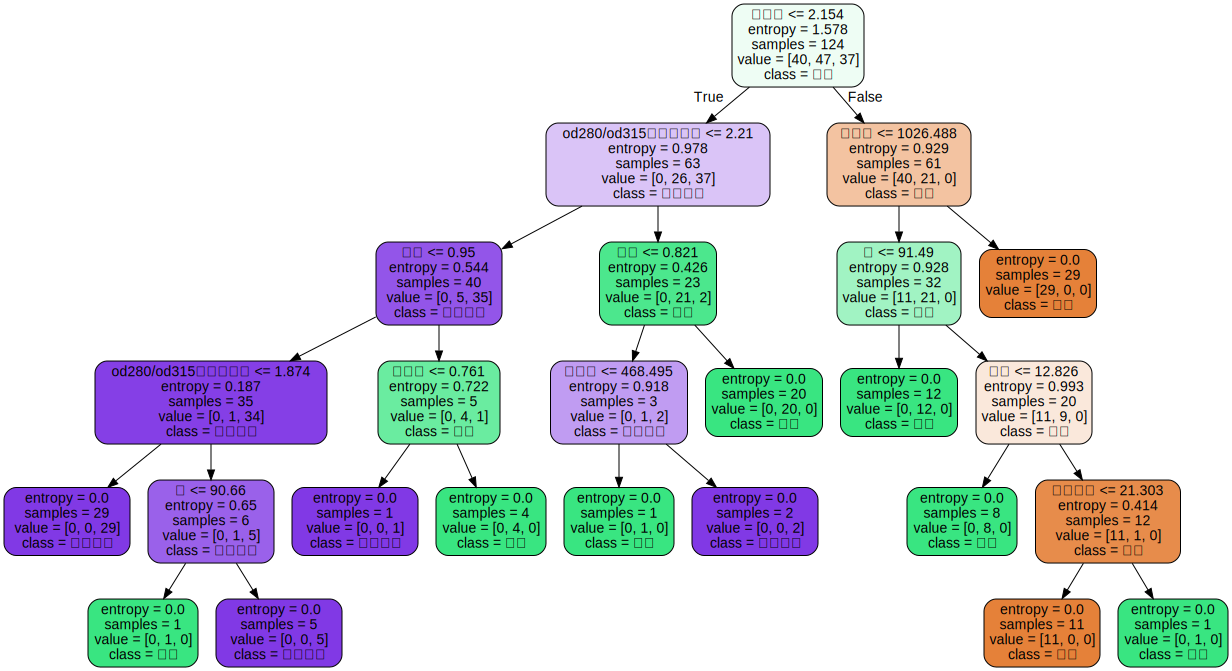

In [62]:
import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names = feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True)
graph = graphviz.Source(dot_data)
graph

In [63]:
#我们的树对训练集的拟合程度如何？
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

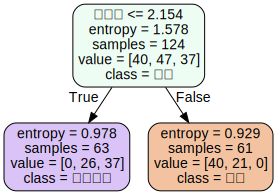

In [77]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=3
                                  ,min_samples_leaf=30
                                  ,min_samples_split=62
                                 )
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [73]:
clf.score(Xtest,Ytest)

0.8518518518518519

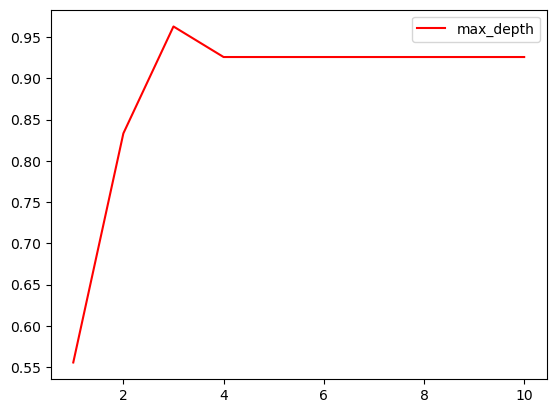

In [90]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                     ,criterion="entropy"
                                     ,random_state=30
                                     ,splitter="random"
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [92]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([20, 22, 18, 24,  4, 15, 24, 22, 22,  9, 15,  7, 15, 15, 18, 24, 15,
        4,  6, 15, 10, 24, 22, 18,  7,  4, 23, 24,  4, 15, 20, 15,  4,  4,
       15, 22, 18, 24, 20, 24, 22, 24, 14, 24, 15,  4, 24,  4, 24,  4, 15,
        4, 24, 18], dtype=int64)

In [93]:
#predict返回每个测试样本的分类/回归结果,返回标签
clf.predict(Xtest)

array([1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0,
       0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 1])